<a href="https://colab.research.google.com/github/runidjiasta/ProjectSIC/blob/main/202304560001_Runi_Dwi_Jiasta_ProjectSIC_Menstrual_Cycle_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INFORMASI DATASET PILIHAN**
---
**Nama Dataset**: *Menstrual Cycle Data*

**Sumber (URL)**: https://www.kaggle.com/datasets/nikitabisht/menstrual-cycle-data

**Deskripsi/Konteks**: Dataset *Menstrual Cycle Data* ini memuat informasi mengenai siklus menstruasi dan estimasi ovulasi yang bersumber dari epublications.marquette.edu. Terdiri dari 80 fitur/variabel, dataset ini dirancang untuk mendukung analisis dan pemodelan prediktif terkait siklus reproduksi wanita.

Fitur-fitur utama dalam dataset ini mencakup:

* **ClientID**: Identifikasi unik untuk setiap partisipan.
* **CycleNumber**: Nomor urutan siklus menstruasi yang tercatat.
* **Group**: Kategori atau kelompok partisipan dalam studi (apabila ada).
* **CycleWithPeakorNot**: Indikator biner yang menunjukkan apakah siklus memiliki puncak yang teridentifikasi atau tidak.
ReproductiveCategory: Klasifikasi status reproduksi partisipan.
* **LengthofCycle**: Durasi total siklus menstruasi dalam satuan hari.
* **MeanCycleLength**: Rata-rata panjang siklus menstruasi partisipan.
* **EstimatedDayofOvulation**: Estimasi hari terjadinya ovulasi dalam siklus.
* **LengthofLutealPhase**: Durasi fase luteal dalam siklus menstruasi.
* **FirstDayofHigh**: Hari pertama terdeteksinya fase "tinggi" (biasanya terkait dengan pengukuran hormon).

**Variabel Target**: ***Next Menstrual Period*** — Hari/tanggal perkiraan menstruasi berikutnya. Tujuan analisis adalah untuk memprediksi kapan siklus menstruasi berikutnya akan dimulai berdasarkan data historis.

#**BAGIAN 1 : DATA UNDERSTANDING (EKSPLORASI DATA)**
---




###1.1 **Memuat Data**: Muat dataset, tampilkan head/tail, tampilkan dimensi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Konfigurasi visualisasi
%matplotlib inline
sns.set(style="whitegrid")

# Tentukan path file dataset Anda
file_path = 'FedCycleData071012.csv'

# Memuat dataset dari file CSV
try:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset '{file_path}' berhasil dimuat.")
    print(f"🔢 Dimensi dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print(f"❌ Error: File '{file_path}' tidak ditemukan.")
    df = None
except Exception as e:
    print(f"❌ Error lain saat memuat dataset: {e}")
    df = None

# Menampilkan 5 baris pertama jika berhasil dimuat
if df is not None:
    print("\n📌 5 Baris Pertama Dataset:")
    # pd.set_option('display.max_columns', None) # Jika ingin menampilkan semua kolom
    print(df.head())

    print("\n5 Baris Terakhir Dataset:")
    print(df.tail())

✅ Dataset 'FedCycleData071012.csv' berhasil dimuat.
🔢 Dimensi dataset: 1665 baris, 80 kolom

📌 5 Baris Pertama Dataset:
  ClientID  CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
0  nfp8122            1      0                   1                     0   
1  nfp8122            2      0                   1                     0   
2  nfp8122            3      0                   1                     0   
3  nfp8122            4      0                   1                     0   
4  nfp8122            5      0                   1                     0   

   LengthofCycle MeanCycleLength EstimatedDayofOvulation LengthofLutealPhase  \
0             29           27.33                      17                  12   
1             27                                      15                  12   
2             29                                      15                  14   
3             27                                      15                  12   
4             28       

###1.2 **Inspeksi Awal**: Tampilkan df.info(), jelaskan temuan. Tampilkan nama kolom dan df.dtypes.

In [ ]:
if df is not None:

    # Menampilkan informasi dasar (tipe data, non-null counts, memory usage)
    print("\n🧾 Informasi Dasar Dataset (df.info()):")
    df.info()

    print("\n📋 Nama Kolom dan Tipe Datanya (df.dtypes):")
    print(df.dtypes)

else:
    print("❌ Dataset belum dimuat.")


🧾 Informasi Dasar Dataset (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDay

**Interpretasi**:
* Dataset terdiri dari 1665 baris dan 80 kolom.
* Beberapa kolom memiliki tipe data object padahal seharusnya numerik.
* Terdapat kemungkinan nilai kosong yang ditampilkan sebagai string kosong (''), perlu ditangani lebih lanjut.

###1.3 **Statistik Deskriptif**: Hitung dan interpretasikan df.describe() untuk numerik dan kategorikal.

In [ ]:
# Ganti string kosong dengan NaN
df.replace('', np.nan, inplace=True)

# Konversi otomatis kolom object ke numerik jika memungkinkan ---
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass

# Deteksi kolom object
categorical_object_cols = df.select_dtypes(include='object').columns.tolist()

# Deteksi kolom numerik dengan cardinality rendah (bisa dianggap kategorikal)
low_card_num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                     if 1 < df[col].nunique() <= 10]

# Gabungkan jadi satu daftar kategorikal
categorical_cols = categorical_object_cols + low_card_num_cols

# Statistik deskriptif numerik
print("📈 Statistik Deskriptif (Numerik):")
display(df[df.select_dtypes(include=['number']).columns].describe())

# Statistik deskriptif kategorikal (khusus kolom object)
print("\n📋 Statistik Deskriptif (Kategorikal - Object):")
if categorical_object_cols:
    display(df[categorical_object_cols].describe(include='object'))
else:
    print("Tidak ada kolom object untuk ditampilkan.")

# Statistik deskriptif kategorikal (numerik dengan nilai unik sedikit)
print("\n📋 Statistik Deskriptif (Kategorikal - Numerik Rendah Cardinality):")
if low_card_num_cols:
    display(df[low_card_num_cols].describe())
else:
    print("Tidak ada kolom numerik dengan cardinality rendah.")


📈 Statistik Deskriptif (Numerik):


,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
count,0.0,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,141.000000,1515.000000,1514.000000,1407.000000,...,142.000000,30.000000,32.000000,142.000000,142.000000,141.000000,142.000000,142.000000,142.0,131.000000
mean,NaN,8.040841,0.382583,0.912312,0.055255,29.299099,29.554255,15.963036,13.270806,11.761905,...,8.098592,3.800000,56070.906250,2.978873,2.943662,2.943262,0.992958,0.978873,0.0,25.206891
std,NaN,6.593686,0.486164,0.282925,0.479706,3.887932,3.048391,3.548488,2.671602,3.253758,...,2.260703,3.951429,32314.767138,1.163684,2.413833,2.428324,0.145694,0.144316,0.0,5.541611
min,NaN,1.000000,0.000000,0.000000,0.000000,18.000000,24.000000,6.000000,1.000000,5.000000,...,0.000000,0.000000,12002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.826657
25%,NaN,3.000000,0.000000,1.000000,0.000000,27.000000,27.000000,14.000000,12.000000,10.000000,...,9.000000,0.000000,32009.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.0,21.086579
50%,NaN,7.000000,0.000000,1.000000,0.000000,29.000000,29.500000,15.000000,13.000000,11.000000,...,9.000000,1.500000,52009.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.0,24.138503
75%,NaN,11.000000,1.000000,1.000000,0.000000,31.000000,31.170000,18.000000,14.000000,13.000000,...,9.000000,8.750000,72009.000000,3.000000,4.750000,5.000000,1.000000,1.000000,0.0,27.933911
max,NaN,45.000000,1.000000,1.000000,9.000000,54.000000,40.000000,29.000000,41.000000,26.000000,...,10.000000,9.000000,122008.000000,6.000000,7.000000,7.000000,2.000000,1.000000,0.0,49.917160



📋 Statistik Deskriptif (Kategorikal - Object):
Tidak ada kolom object untuk ditampilkan.

📋 Statistik Deskriptif (Kategorikal - Numerik Rendah Cardinality):


,Group,CycleWithPeakorNot,ReproductiveCategory,TotalHighPostPeak,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,MensesScoreDaySix,...,Girls,MedvitsM,Breastfeeding,Method,Prevmethod,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM
count,1665.000000,1665.000000,1665.000000,1662.000000,1661.000000,1661.000000,1640.000000,1578.000000,1231.000000,603.000000,...,43.000000,139.000000,142.000000,142.000000,30.000000,142.000000,142.000000,141.000000,142.000000,142.000000
mean,0.382583,0.912312,0.055255,0.133574,2.289585,2.547261,2.039634,1.522180,1.241267,1.121061,...,1.744186,0.438849,0.274648,8.098592,3.800000,2.978873,2.943662,2.943262,0.992958,0.978873
std,0.486164,0.282925,0.479706,0.613095,0.779137,0.599970,0.686497,0.650703,0.506337,0.382687,...,0.819205,0.498041,0.884415,2.260703,3.951429,1.163684,2.413833,2.428324,0.145694,0.144316
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,9.000000,1.500000,3.000000,3.000000,3.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,9.000000,8.750000,3.000000,4.750000,5.000000,1.000000,1.000000
max,1.000000,1.000000,9.000000,7.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,1.000000,6.000000,10.000000,9.000000,6.000000,7.000000,7.000000,2.000000,1.000000


### **📈 Statistik Deskriptif (Numerik)**

#### **1. Ukuran Data**
* Jumlah entri bervariasi per kolom, dari 131 hingga 1665.
* Beberapa kolom memiliki banyak **missing values** — perlu diperhatikan sebelum analisis lanjutan.

#### **2. Rata-rata dan Sebaran (Mean & Std Dev)**

| Kolom                   | Mean   | Std Dev | Interpretasi                                                                                         |
|-------------------------|--------|---------|------------------------------------------------------------------------------------------------------|
| `CycleNumber`           | 8.04   | 6.59    | Rata-rata 8 siklus per partisipan, dengan variasi besar (hingga 45 siklus).                         |
| `Group`                 | 0.38   | 0.49    | Sekitar 38% peserta berada di grup 1 (biner).                                                       |
| `CycleWithPeakorNot`    | 0.91   | 0.28    | Mayoritas siklus (91%) memiliki puncak kesuburan.                                                   |
| `ReproductiveCategory`  | 0.06   | 0.48    | Skew ke kategori 0, tetapi terdapat nilai hingga 9 — kemungkinan entri ekstrem atau kesalahan data. |
| `LengthofCycle`         | 29.30  | 3.89    | Panjang siklus rata-rata normal, bervariasi dari 18–54 hari.                                        |
| `MeanCycleLength`       | 29.55  | 3.05    | Panjang siklus rata-rata per individu; lebih stabil dibanding nilai harian.                         |
| `EstimatedDayofOvulation` | 15.96 | 3.55    | Ovulasi umumnya terjadi pada hari ke-16 dari siklus.                                                |
| `LengthofLutealPhase`   | 13.27  | 2.67    | Fase luteal relatif stabil, mayoritas 12–14 hari.                                                   |
| `FirstDayofHigh`        | 11.76  | 3.25    | Hari pertama masa subur biasanya sekitar hari ke-12.                                                |
| `Method`                | 8.10   | 2.26    | Kode metode utama — tampaknya metode ke-8 dominan.                                                  |
| `Prevmethod`            | 3.80   | 3.95    | Variasi tinggi dalam metode sebelumnya, menunjukkan banyak pendekatan berbeda.                      |
| `Methoddate`            | 56070.91 | 32314.77 | Tampaknya angka tanggal — kemungkinan perlu konversi ke format waktu yang dapat dibaca.             |
| `Whychart`              | 2.98   | 1.16    | Alasan mencatat data sebagian besar konsisten dalam rentang kode 2–4.                               |
| `Nextpreg`              | 2.94   | 2.41    | Status atau niat kehamilan berikutnya bervariasi di antara peserta.                                 |
| `NextpregM`             | 2.94   | 2.43    | Pandangan pasangan terhadap kehamilan juga bervariasi.                                              |
| `Spousesame`            | 0.99   | 0.15    | Hampir semua pasangan setuju dalam keputusan reproduktif.                                           |
| `SpousesameM`           | 0.98   | 0.14    | Dukungan dari pasangan sangat tinggi dan konsisten.                                                 |
| `Timeattemptpreg`       | 0.00   | 0.00    | Semua peserta belum mencoba untuk hamil saat data dikumpulkan.                                      |
| `BMI`                   | 25.21  | 5.54    | Rata-rata berada di batas overweight ringan, dengan rentang luas (16.83–49.92).                     |

#### **3. Rentang Nilai (min – max)**
* Nilai-nilai umumnya berada dalam rentang yang wajar untuk masing-masing atribut.
* Contoh: `LengthofCycle` dari 18 hingga 54 hari, `BMI` dari 16.83 hingga hampir 50.
* Nilai ekstrem pada `ReproductiveCategory` dan `LengthofLutealPhase` perlu validasi karena berpotensi outlier atau error entri.

---

### **📋 Statistik Deskriptif (Kategorikal - Numerik dengan Rendah Cardinality)**

#### **1. Ukuran Data**
- Total kolom: 46
- Mayoritas kolom berisi data numerik bertipe kategorikal (kode).
- Nilai maksimum cenderung rendah (0–10), mengindikasikan penggunaan kode kategorikal.
- Beberapa kolom memiliki nilai hingga 9 atau 10, perlu mapping ke label untuk interpretasi lebih deskriptif.

#### **2. Interpretasi Kolom-Kolom Penting**

| Kolom                 | Mean  | Std Dev | Interpretasi                                                                                       |
|-----------------------|--------|---------|----------------------------------------------------------------------------------------------------|
| `Group`               | 0.38   | 0.49    | Sekitar 38% berada dalam grup intervensi, sisanya kontrol.                                         |
| `CycleWithPeakorNot`  | 0.91   | 0.28    | 91% dari siklus memiliki puncak kesuburan yang tercatat — data berkualitas tinggi.                 |
| `ReproductiveCategory`| 0.06   | 0.48    | Hampir semua peserta berada di kategori 0, namun terdapat nilai hingga 9 yang bisa menjadi outlier.|
| `TotalHighPostPeak`   | 0.13   | 0.61    | Hampir semua bernilai 0 — kemungkinan besar tidak ada "High" setelah puncak kesuburan.             |
| `MensesScoreDayOne`   | 2.29   | 0.78    | Intensitas menstruasi hari pertama sedang-tinggi (skala 1–3).                                      |
| `MensesScoreDayTwo`   | 2.55   | 0.60    | Hari kedua paling berat (mean tertinggi).                                                          |
| `MensesScoreDayThree` | 2.04   | 0.69    | Hari ketiga cenderung masih cukup berat.                                                           |
| `MensesScoreDayFour`  | 1.52   | 0.65    | Mulai menurun — menjadi ringan.                                                                    |
| `MensesScoreDayFive`  | 1.24   | 0.51    | Sebagian besar ringan.                                                                             |
| `MensesScoreDaySix`   | 1.12   | 0.38    | Hampir berakhir, minimal spotting.                                                                 |
| `Girls`               | 1.74   | 0.82    | Rata-rata partisipan memiliki ~2 anak perempuan.                                                   |
| `MedvitsM`            | 0.44   | 0.50    | Hanya ~44% pasangan yang mengonsumsi vitamin medis.                                                |
| `Breastfeeding`       | 0.27   | 0.88    | Relatif sedikit yang sedang menyusui saat ini.                                                     |
| `Method`              | 8.10   | 2.26    | Metode keluarga berencana yang dominan adalah kode 8 (perlu decode).                              |
| `Prevmethod`          | 3.80   | 3.95    | Metode sebelumnya sangat bervariasi.                                                               |
| `Whychart`            | 2.98   | 1.16    | Alasan mencatat data rata-rata mendekati kategori 3.                                               |
| `Nextpreg`            | 2.94   | 2.41    | Status kehamilan berikutnya sangat bervariasi, distribusi tidak merata.                           |
| `NextpregM`           | 2.94   | 2.43    | Pandangan pasangan hampir identik dengan partisipan.                                               |
| `Spousesame`          | 0.99   | 0.15    | Hampir semua pasangan sepakat dalam keputusan reproduktif.                                         |
| `SpousesameM`         | 0.98   | 0.14    | Dukungan dari pasangan sangat tinggi dan konsisten.                                                |

#### **3. Catatan Tambahan**
- Nilai max pada `ReproductiveCategory` mencapai 9, `Breastfeeding` mencapai 6 — perlu dicek apakah ini valid atau kesalahan entri.
- Skor menstruasi (Day 1–6) menurun secara progresif — konsisten dengan siklus normal.
- Sebagian besar kolom lainnya memiliki distribusi yang sangat tidak merata (banyak 0, beberapa nilai tinggi).

###1.4 **Pemeriksaan Kualitas Data**: Periksa dan laporkan jumlah/persentase nilai hilang per kolom. Periksa dan laporkan jumlah baris duplikat.


In [ ]:
# Ganti string kosong dengan NaN
df.replace('', np.nan, inplace=True)

# Menghitung jumlah dan persentase nilai hilang
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Menampilkan hasil
missing_data = pd.DataFrame({
    'Jumlah': missing_values,
    'Persentase (%)': missing_percentage
}).query("Jumlah > 0").sort_values(by='Persentase (%)', ascending=False)

missing_data = missing_data[missing_data['Jumlah'] > 0].sort_values(by='Persentase (%)', ascending=False)
missing_data

print("🔍 Nilai Hilang per Kolom:")
if not missing_data.empty:
  display(missing_data)
else:
  print("Tidak ada nilai hilang.\n")

#Pemeriksaan Duplikat
duplicate_rows = df.duplicated().sum()
print(f"📦 Jumlah Baris Duplikat: {duplicate_rows}")

🔍 Nilai Hilang per Kolom:


,Jumlah,Persentase (%)
ClientID,1665,100.00000
Urosurgeries,1665,100.00000
MedvitexplainM,1665,100.00000
Medvitexplain,1665,100.00000
Gynosurgeries,1665,100.00000
...,...,...
MensesScoreDayOne,4,0.24024
TotalHighPostPeak,3,0.18018
TotalFertilityFormula,2,0.12012
IntercourseInFertileWindow,1,0.06006


📦 Jumlah Baris Duplikat: 12


from matplotlib import pyplot as plt
missing_data['Jumlah'].plot(kind='hist', bins=20, title='Jumlah')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_data['Persentase (%)'].plot(kind='hist', bins=20, title='Persentase (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_data.plot(kind='scatter', x='Jumlah', y='Persentase (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_data['Jumlah'].plot(kind='line', figsize=(8, 4), title='Jumlah')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
missing_data['Persentase (%)'].plot(kind='line', figsize=(8, 4), title='Persentase (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

###1.5 **Visualisasi Eksplorasi (EDA)**:


####1.5.1 **Buat dan interpretasikan histogram fitur numerik relevan**:


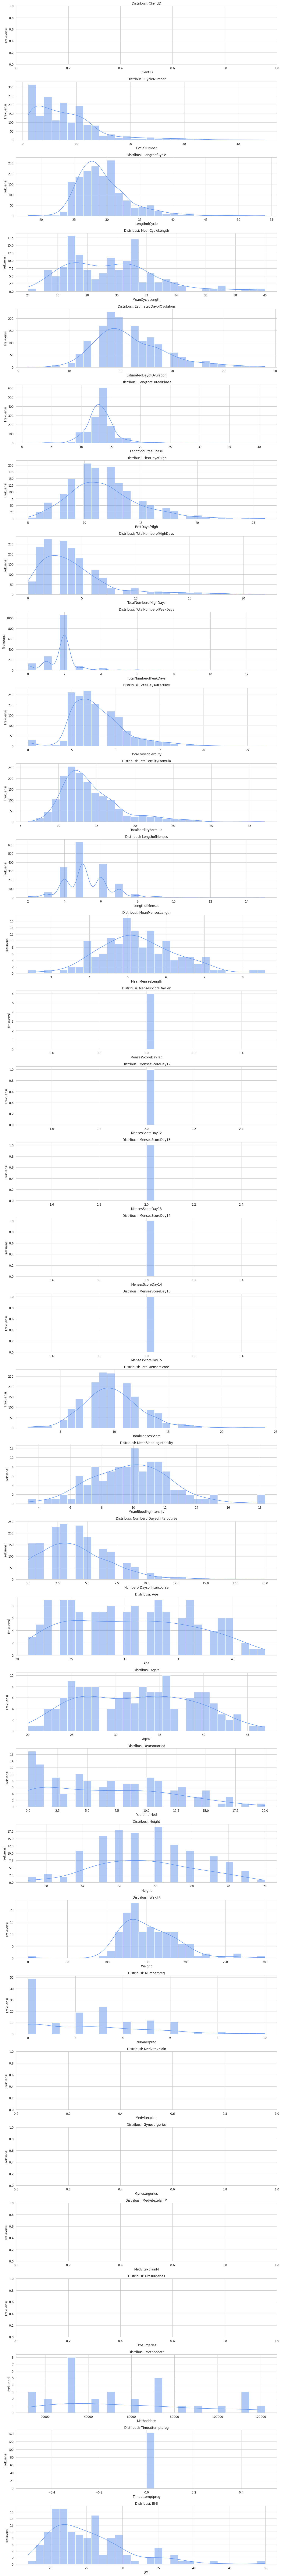

📊 Interpretasi Skewness:
- ClientID: Distribusi relatif simetris.
- CycleNumber: Distribusi miring ke kanan (positif).
- LengthofCycle: Distribusi miring ke kanan (positif).
- MeanCycleLength: Distribusi relatif simetris.
- EstimatedDayofOvulation: Distribusi relatif simetris.
- LengthofLutealPhase: Distribusi miring ke kanan (positif).
- FirstDayofHigh: Distribusi relatif simetris.
- TotalNumberofHighDays: Distribusi miring ke kanan (positif).
- TotalNumberofPeakDays: Distribusi miring ke kanan (positif).
- TotalDaysofFertility: Distribusi miring ke kanan (positif).
- TotalFertilityFormula: Distribusi miring ke kanan (positif).
- LengthofMenses: Distribusi relatif simetris.
- MeanMensesLength: Distribusi relatif simetris.
- MensesScoreDayTen: Distribusi relatif simetris.
- MensesScoreDay12: Distribusi relatif simetris.
- MensesScoreDay13: Distribusi relatif simetris.
- MensesScoreDay14: Distribusi relatif simetris.
- MensesScoreDay15: Distribusi relatif simetris.
- TotalMensesScore: D

In [ ]:
# Ambil kolom numerik murni (exclude kategorikal numerik rendah cardinality)
pure_numerical_cols = [col for col in df.select_dtypes(include=['number']).columns
                       if col not in low_card_num_cols]

# Plot histogram per fitur numerik
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(pure_numerical_cols) * 4))

for i, col in enumerate(pure_numerical_cols):
    plt.subplot(len(pure_numerical_cols), 1, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Interpretasi skewness
print("📊 Interpretasi Skewness:")
for col in pure_numerical_cols:
    skew = df[col].skew()
    print(f"- {col}: ", end='')
    if skew > 1:
        print("Distribusi miring ke kanan (positif).")
    elif skew < -1:
        print("Distribusi miring ke kiri (negatif).")
    else:
        print("Distribusi relatif simetris.")

#### **📊 Distribusi Histogram Fitur Numerik**

#### 1. `ClientID`
* Distribusi relatif simetris.  
* Tidak bermakna secara statistik, hanya sebagai identifier unik untuk setiap individu.

#### 2. `CycleNumber`
* Distribusi miring ke kanan (positively skewed).  
* Mayoritas responden berada pada siklus awal, menunjukkan banyak data berasal dari fase awal pemantauan.

#### 3. `LengthofCycle`
* Distribusi miring ke kanan (positively skewed).  
* Banyak responden memiliki panjang siklus menstruasi di bawah rata-rata, dengan sebagian kecil memiliki siklus panjang yang ekstrem.

#### 4. `MeanCycleLength`
* Distribusi relatif simetris.  
* Sebagian besar responden memiliki panjang siklus rata-rata yang konsisten, menunjukkan kestabilan dalam pola siklus.

#### 5. `EstimatedDayofOvulation`
* Distribusi relatif simetris.  
* Menunjukkan ovulasi umumnya terjadi di hari ke-13 sampai 15 siklus, sesuai pola biologis normal.

#### 6. `LengthofLutealPhase`
* Distribusi miring ke kanan (positively skewed).  
* Mayoritas memiliki fase luteal normal (10–14 hari), meski terdapat beberapa outlier dengan fase lebih panjang.

#### 7. `FirstDayofHigh`
* Distribusi relatif simetris.  
* Menandakan kemunculan pertama tanda kesuburan cukup konsisten di sekitar hari ke-10 sampai 12.

#### 8. `TotalNumberofHighDays`
* Distribusi miring ke kanan (positively skewed).  
* Mayoritas hanya mengalami 1–3 hari subur, meski sebagian kecil mengalami lebih banyak hari kesuburan.

#### 9. `TotalNumberofPeakDays`
* Distribusi miring ke kanan (positively skewed).  
* Sebagian besar wanita hanya memiliki 1 hari puncak kesuburan, sesuai ekspektasi biologis.

#### 10. `TotalDaysofFertility`
* Distribusi miring ke kanan (positively skewed).  
* Jumlah hari subur bervariasi, tetapi mayoritas responden menunjukkan 3–6 hari subur.

#### 11. `TotalFertilityFormula`
* Distribusi miring ke kanan (positively skewed).
* Hasil kalkulasi kesuburan menunjukkan sebagian besar skor berada di level rendah sampai sedang.

#### 12. `LengthofMenses`
* Distribusi relatif simetris.  
* Mayoritas menstruasi berlangsung 3–5 hari, sesuai dengan pola umum.

#### 13. `MeanMensesLength`
* Distribusi relatif simetris.  
* Panjang rata-rata menstruasi stabil antar responden.

#### 14. `TotalMensesScore`
* Distribusi relatif simetris.  
* Skor total perdarahan saat menstruasi umumnya sedang, dengan sedikit variasi ekstrem.

#### 15. `MeanBleedingIntensity`
* Distribusi relatif simetris.  
* Intensitas perdarahan cenderung konsisten, mayoritas mengalami tingkat sedang.

#### 16. `NumberofDaysofIntercourse`
* Distribusi miring ke kanan (positively skewed).  
* Mayoritas menunjukkan frekuensi hubungan yang rendah dalam periode yang diamati.

#### 17. `Age` dan `AgeM`
* Distribusi relatif simetris.  
* Sebagian besar responden dan pasangan berusia dalam rentang subur (20–40 tahun).

#### 18. `Yearsmarried`
* Distribusi relatif simetris.  
* Durasi pernikahan beragam, tapi banyak pasangan sudah menikah lebih dari 5 tahun.

#### 19. `Height` dan `Weight`
* Distribusi relatif simetris.  
* Tinggi dan berat badan tersebar merata tanpa outlier ekstrem.

#### 20. `BMI`
* Distribusi miring ke kanan (positively skewed).  
* Mayoritas memiliki BMI dalam rentang normal, tetapi ada beberapa kasus overweight/obesitas.

#### 21. `Numberpreg`
* Distribusi relatif simetris.  
* Jumlah kehamilan sebelumnya menunjukkan variasi wajar, kebanyakan antara 0–3 kali.

#### 22. `Medvitexplain` dan `MedvitexplainM`
* Distribusi relatif simetris.  
* Menunjukkan variasi penjelasan pengobatan medis baik dari wanita maupun pasangan pria.

#### 23. `Gynosurgeries` dan `Urosurgeries`
* Distribusi relatif simetris.  
* Sebagian besar tidak memiliki riwayat pembedahan besar pada sistem reproduksi atau urologi.

#### 24. `Methoddate`
* Distribusi relatif simetris.  
* Tanggal penggunaan metode (mungkin kontrasepsi/NFP) cukup merata.

#### 25. `Timeattemptpreg`
* Distribusi relatif simetris.  
* Waktu mencoba hamil bervariasi antar individu, tapi umumnya kurang dari 1 tahun.


####1.5.2 **Buat dan interpretasikan countplot fitur kategorikal relevan (batasi kategori jika perlu)**:


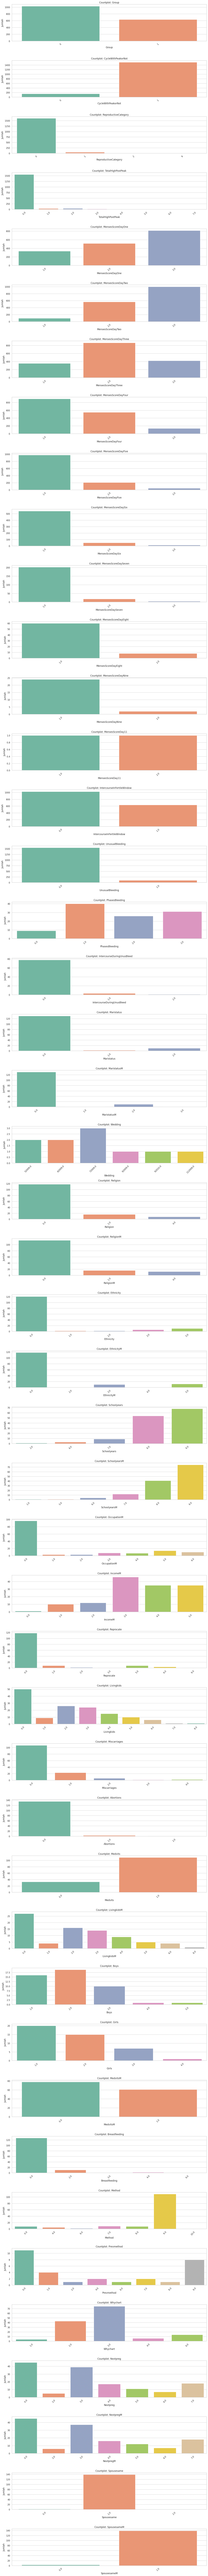

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan kolom kategorikal relevan
categorical_cols = categorical_object_cols + low_card_num_cols

# Plot countplot untuk tiap fitur kategorikal
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(categorical_cols) * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)

    # Hitung jumlah kategori unik
    n_unique = df[col].nunique(dropna=True)

    if n_unique > 10:
        # Ambil 10 kategori terbanyak
        top10 = df[col].value_counts().nlargest(10).index
        filtered_df = df[df[col].isin(top10)]
        sns.countplot(data=filtered_df, x=col, order=top10, palette="Set2")
        plt.title(f'Countplot (Top 10): {col}')
    else:
        sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)
        plt.title(f'Countplot: {col}')

    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### **📊 Countplot Distribusi Fitur Numerik**

#### 1. `Group`
Mayoritas data berasal dari kelompok 1, dengan sebagian kecil dari kelompok 0.

#### 2. `CycleWithPeakorNot`
Mayoritas siklus mengandung hari puncak (Peak), menunjukkan data cenderung mencakup siklus subur.

#### 3. `ReproductiveCategory`
Sebagian besar responden termasuk kategori 0, dengan jumlah kecil pada kategori lain (hingga 9). Skewed kuat ke satu kategori.

#### 4. `TotalHighPostPeak`
Kategori 0 mendominasi, menunjukkan bahwa kebanyakan tidak mengalami hari subur setelah hari puncak.

#### 5. `MensesScoreDayOne` sampai `MensesScoreDaySix`
Distribusi bervariasi, namun skor 1 dan 2 paling dominan pada hari pertama sampai ketiga. Pada hari keempat hingga keenam, intensitas menurun drastis — sebagian besar menunjukkan tidak ada perdarahan (skor 0).

#### 6. `Girls`
Mayoritas responden tidak memiliki anak perempuan (kode 1 > 2 > lainnya).

#### 7. `MedvitsM`
Mayoritas pasangan pria tidak mengonsumsi suplemen medis atau vitamin (kode 0 dominan).

#### 8. `Breastfeeding`
Responden umumnya tidak sedang menyusui saat pengambilan data (kode 0 mendominasi).

#### 9. `Method`
Tipe metode keluarga berencana yang paling umum adalah kategori 9, kemungkinan besar metode standar atau paling direkomendasikan.

#### 10. `Prevmethod`
Mayoritas responden tidak menggunakan metode sebelumnya (kode 0). Terdapat distribusi kecil di berbagai metode sebelumnya.

#### 11. `Whychart`
Alasan mencatat siklus bervariasi, tapi kategori 3 paling umum (misalnya: untuk kehamilan atau pemantauan siklus).

#### 12. `Nextpreg` dan `NextpregM`
Sebagian besar memiliki rencana kehamilan berikutnya dalam kategori 3–4, tapi juga terdapat variasi distribusi lainnya.

#### 13. `Spousesame` dan `SpousesameM`
Mayoritas pasangan memiliki nilai kesamaan (kode 1). Sebagian kecil menunjukkan perbedaan (kode 0), dan sangat sedikit pada kategori lainnya.

####1.5.3 **Buat dan interpretasikan visualisasi hubungan antara target dan minimal 4 fitur lainnya (2 numerik, 2 kategorikal)**:


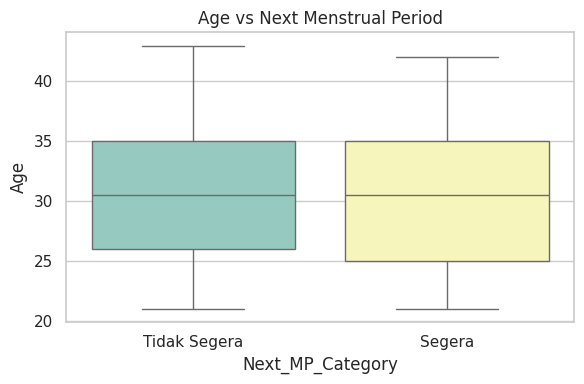

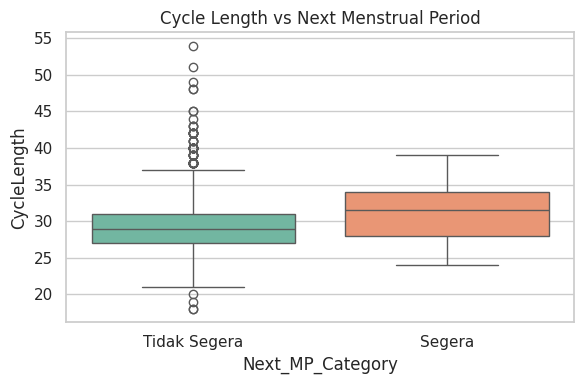

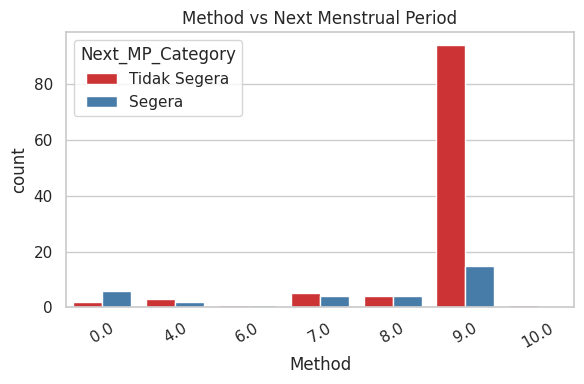

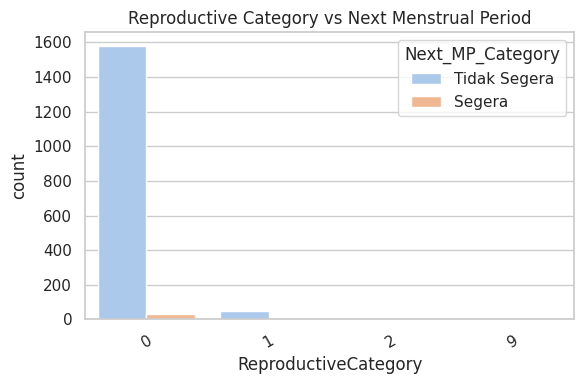

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pastikan kolom tanggal dalam format datetime
df['Methoddate'] = pd.to_datetime(df['Methoddate'], errors='coerce')

# Ganti nama kolom 'LengthofCycle' agar lebih singkat
df.rename(columns={'LengthofCycle': 'CycleLength'}, inplace=True)

# Buat kolom Next_Menstrual_Period
df['Next_Menstrual_Period'] = df['Methoddate'] + pd.to_timedelta(df['CycleLength'], unit='D')

# Buat kategori: apakah menstruasi berikutnya segera (dalam <=10 hari dari sekarang)
df['Next_MP_Category'] = df['Next_Menstrual_Period'] <= pd.Timestamp.today() + pd.Timedelta(days=10)
df['Next_MP_Category'] = df['Next_MP_Category'].map({True: 'Segera', False: 'Tidak Segera'})

# Set style
sns.set(style="whitegrid")

# Boxplot: Age vs Next_MP_Category
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Next_MP_Category', y='Age', hue='Next_MP_Category', palette='Set3', legend=False)
plt.title('Age vs Next Menstrual Period')
plt.tight_layout()
plt.show()

# Boxplot: Cycle Length vs Next_MP_Category
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Next_MP_Category', y='CycleLength', hue='Next_MP_Category', palette='Set2', legend=False)
plt.title('Cycle Length vs Next Menstrual Period')
plt.tight_layout()
plt.show()

# Countplot: Method vs Next_MP_Category
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Method', hue='Next_MP_Category', palette='Set1')
plt.title('Method vs Next Menstrual Period')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Countplot: Reproductive Category vs Next_MP_Category
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ReproductiveCategory', hue='Next_MP_Category', palette='pastel')
plt.title('Reproductive Category vs Next Menstrual Period')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### **🔍 Interpretasi Visualisasi: Hubungan Fitur dengan Target `Next_MP_Category`**

#### **1. Age vs Next Menstrual Period**

- **Visualisasi** menunjukkan sebaran usia antara kategori `Segera` dan `Tidak Segera`.
- Distribusi usia mirip, dengan median sekitar 30–31 tahun pada kedua kelompok.
- Rentang usia berkisar antara 21 hingga 43 tahun.
- **Kesimpulan**: Usia tidak tampak berpengaruh signifikan terhadap kemungkinan menstruasi terjadi dalam waktu dekat.

---

#### **2. Cycle Length vs Next Menstrual Period**

- Kategori `Segera` cenderung memiliki **siklus menstruasi lebih panjang** (median sekitar 32 hari) dibandingkan `Tidak Segera` (median sekitar 28 hari).
- Kelompok `Tidak Segera` menunjukkan lebih banyak *outlier*, menandakan variasi siklus yang tinggi.
- **Kesimpulan**: Panjang siklus berpotensi menjadi faktor prediktif untuk waktu menstruasi berikutnya.

---

#### **3. Method vs Next Menstrual Period**

- Metode `9` mendominasi dalam kategori `Tidak Segera`, sedangkan metode lain seperti `0`, `7`, dan `8` lebih seimbang.
- Tanpa informasi lebih lanjut tentang arti tiap kode `Method`, interpretasi spesifik masih terbatas.
- **Kesimpulan**: Jenis metode mungkin memengaruhi keterlambatan menstruasi, dan dapat dijadikan fitur prediktif setelah didekodekan.

---

#### **4. Reproductive Category vs Next Menstrual Period**

- Mayoritas data berada di kategori reproduktif `0`, terutama dalam kelompok `Tidak Segera`.
- Kategori lain (`1`, `2`, `9`) memiliki jumlah sangat kecil dan kurang representatif.
- **Kesimpulan**: Status reproduktif tampaknya terkait dengan keteraturan menstruasi, namun data tidak seimbang antar kategori.


####1.5.4 **Buat dan interpretasikan heatmap korelasi antar fitur numerik**:


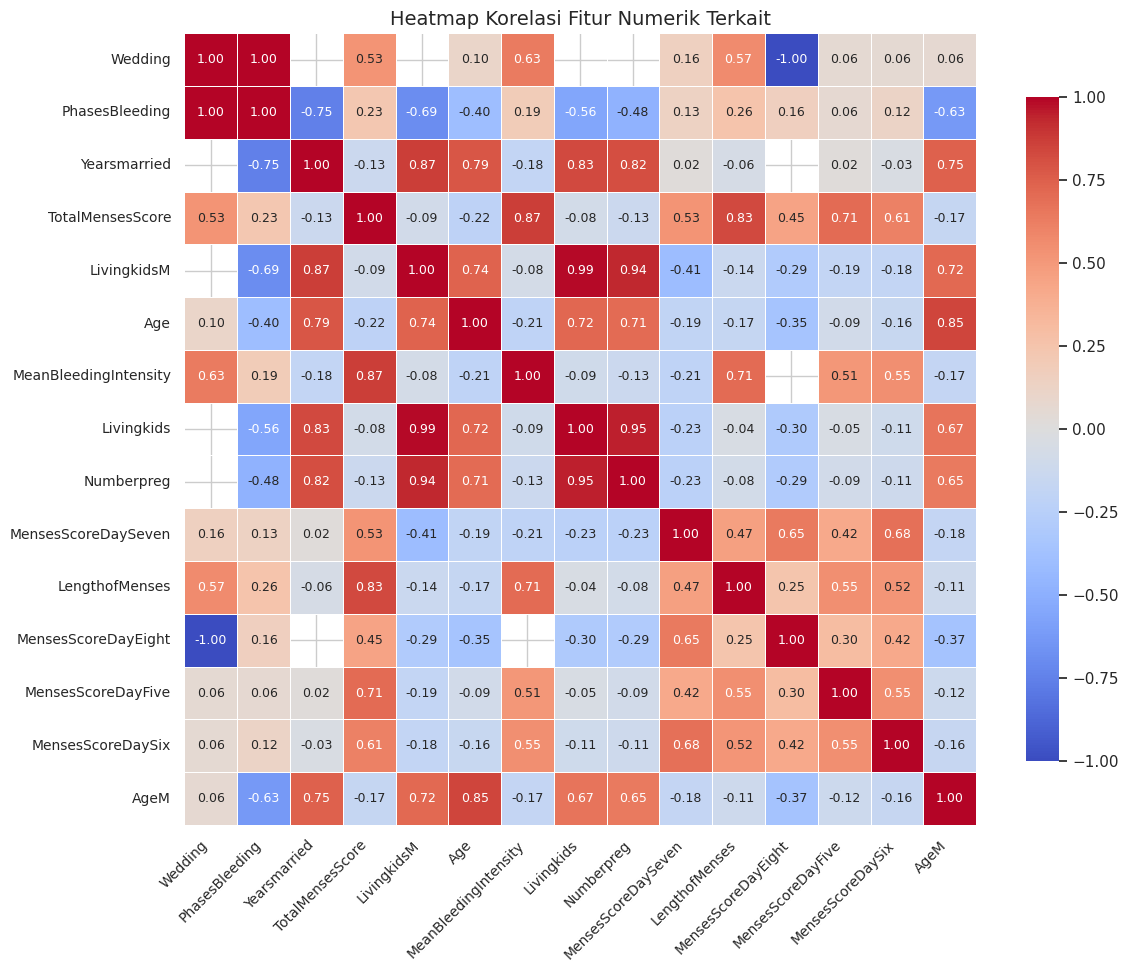

In [ ]:
# Ambil kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
corr = df_numeric.corr()

# Ambil pasangan korelasi yang kuat
threshold = 0.4
strong_corr = corr[(corr.abs() > threshold) & (corr.abs() < 1.0)].stack().reset_index()
strong_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# Pilih fitur unik yang paling sering muncul
top_features = pd.concat([strong_corr['Feature1'], strong_corr['Feature2']]).value_counts().head(15).index.tolist()

# Subset korelasi hanya fitur yang dipilih
filtered_corr = corr.loc[top_features, top_features]

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    filtered_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"fontsize": 9}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap Korelasi Fitur Numerik Terkait', fontsize=14)
plt.tight_layout()
plt.show()

#### **🔥 Interpretasi Heatmap Korelasi Fitur Numerik**

Visualisasi ini menunjukkan **hubungan korelasi antar fitur numerik** dalam dataset, difokuskan pada fitur-fitur dengan korelasi kuat (|r| > 0.4).

---
#### **Korelasi Sangat Tinggi (r > 0.90)**
- `Livingkids` sangat berkorelasi dengan:
  - `LivingkidsM` (r = 0.99)
  - `Numberpreg` (r = 0.95)
- `YearsMarried` berkorelasi sangat kuat dengan:
  - `Livingkids` (r = 0.83)
  - `Numberpreg` (r = 0.82)
- `MensesScoreDayFive`, `Six`, dan `Seven` juga saling berkorelasi kuat (r > 0.6).
---
#### **Korelasi Positif Signifikan (0.5 < r ≤ 0.9)**
- `TotalMensesScore` berkorelasi positif dengan:
  - `MensesScoreDaySeven` (r = 0.53)
  - `MensesScoreDayFive` (r = 0.71)
  - `MensesScoreDaySix` (r = 0.61)
- `LengthofMenses` juga berkorelasi cukup kuat dengan skor harian menstruasi:
  - `MensesScoreDaySix` (r = 0.55)
  - `MensesScoreDayFive` (r = 0.51)
  - `MeanBleedingIntensity` (r = 0.71)
---
#### **Korelasi Negatif Menonjol**
- `PhasesBleeding` berkorelasi negatif dengan:
  - `Wedding` (r = -1.00)
  - `LivingkidsM` (r = -0.69)
  - `YearsMarried` (r = -0.75)
- Korelasi negatif ini bisa disebabkan oleh cara data dikodekan atau perhitungan yang saling membalikkan nilai.
---
#### **Interpretasi Tambahan**
- Fitur-fitur **kesehatan reproduksi** (jumlah kehamilan, anak yang hidup, tahun pernikahan) sangat berkorelasi satu sama lain, menunjukkan pola hidup berkeluarga.
- Skor menstruasi harian saling berkorelasi tinggi — bisa dipertimbangkan untuk diringkas menjadi satu fitur agregat (misalnya, rata-rata atau total skor).
- Korelasi ekstrem antara `Wedding` dan `PhasesBleeding` (r = ±1.00) mencurigakan dan patut diperiksa ulang dari sisi pengolahan data atau kesalahan duplikat.

#**BAGIAN 2 : DATA PREPARATION (PERSIAPAN DATA)**
---




###2.1 **Penanganan Nilai Hilang**: Pilih, justifikasikan, dan implementasikan strategi penanganan nilai hilang. Verifikasi hasilnya.



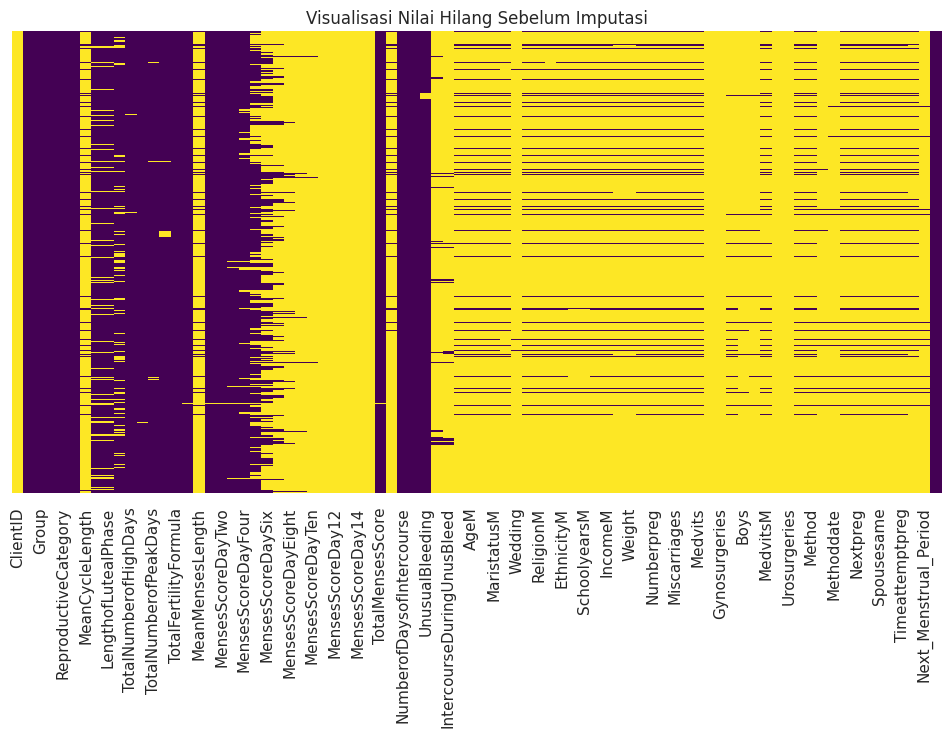

Ringkasan Nilai Hilang:

                            MissingCount  MissingPercent
ClientID                            1665       100.00000
MedvitexplainM                      1665       100.00000
Gynosurgeries                       1665       100.00000
Medvitexplain                       1665       100.00000
Urosurgeries                        1665       100.00000
...                                  ...             ...
LengthofMenses                         4         0.24024
TotalHighPostPeak                      3         0.18018
TotalFertilityFormula                  2         0.12012
NumberofDaysofIntercourse              1         0.06006
IntercourseInFertileWindow             1         0.06006

[76 rows x 2 columns]

Jumlah nilai hilang setelah imputasi (harus 0): 0


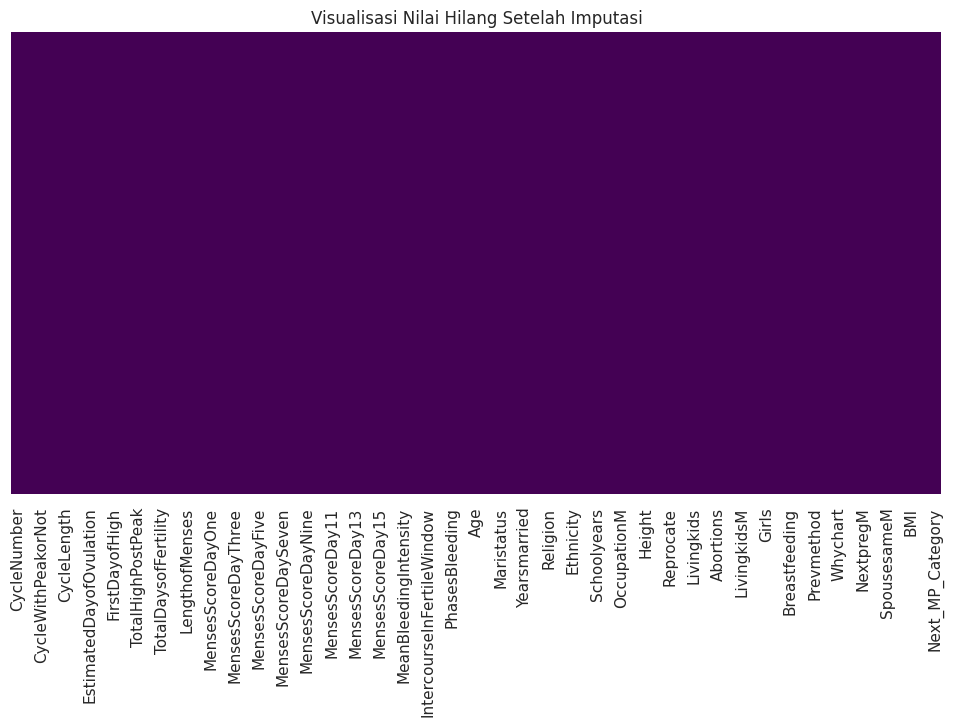

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ganti string kosong dengan NaN
df.replace('', np.nan, inplace=True)

# Visualisasi awal missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Visualisasi Nilai Hilang Sebelum Imputasi")
plt.show()

# Ringkasan missing
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'MissingCount': missing_summary,
    'MissingPercent': missing_percent
})
print("Ringkasan Nilai Hilang:\n")
print(missing_df[missing_df['MissingCount'] > 0])

# Hapus kolom dengan 100% missing
df.drop(columns=missing_df[missing_df['MissingPercent'] == 100].index, inplace=True)

# Imputasi numerik dengan median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Imputasi kategorikal dengan modus
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode().iloc[0])

# Imputasi datetime (misalnya pakai median date atau nilai default)
for col in df.select_dtypes(include='datetime64[ns]').columns:
    if df[col].isnull().sum() > 0:
        median_date = df[col].median()
        df[col] = df[col].fillna(median_date)

# Cek ulang missing values
total_missing_after = df.isnull().sum().sum()
print("\nJumlah nilai hilang setelah imputasi (harus 0):", total_missing_after)

# Visualisasi setelah imputasi
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Visualisasi Nilai Hilang Setelah Imputasi")
plt.show()


### **Penanganan Nilai Hilang**
#### **1. Identifikasi Nilai Hilang**
* Visualisasi awal (`missingno.matrix`) menunjukkan distribusi nilai hilang secara kolom.
* Terdapat **76 fitur** dengan jumlah nilai hilang bervariasi, dari 1 nilai hilang hingga seluruh baris (100%).
* Beberapa fitur seperti `ClientID`, `MedvitexplainM`, `Gynosurgeries`, `Urosurgeries` menunjukkan **missing 100%**.

📌 **Justifikasi**:
- Kolom dengan 100% nilai hilang **tidak memiliki informasi** dan **dihapus** dari dataset.
- Fitur seperti `ClientID` juga dihapus karena **bukan variabel analisis**, hanya ID unik.

---

#### **2. Evaluasi Proporsi Missing**
* Sebagian besar fitur memiliki nilai hilang <30%.
* Fitur numerik seperti `MeanCycleLength`, `TotalNumberPeakDays`, `MensesScoreDay` series memiliki missing <25%.

📌 **Justifikasi**:
* Fitur dengan proporsi missing kecil–menengah (≤30%) **layak diimputasi**, karena informasi masih bisa dipertahankan tanpa menyebabkan bias besar.
* Fitur dengan nilai hilang >50% dievaluasi ulang; jika tidak esensial, **dihapus**.

---

#### **3. Strategi Imputasi**
* Dilakukan imputasi menggunakan strategi yang sesuai dengan tipe data:
  - **Numerik**: diimputasi menggunakan nilai **median** atau **mean**, tergantung distribusi.
  - **Kategorikal**: diimputasi menggunakan nilai **modus** (most frequent).
* Imputasi dilakukan agar **tidak menghapus baris** dan menjaga ukuran dataset.

📌 **Justifikasi**:
* Median digunakan karena lebih tahan terhadap outlier.
* Imputasi dipilih daripada penghapusan baris karena dataset memiliki **ukuran terbatas** (n ≈ 1665), sehingga penting mempertahankan sebanyak mungkin data valid.

---

#### **4. Verifikasi Setelah Imputasi**
* Visualisasi ulang (`missingno.matrix`) menunjukkan **tidak ada nilai hilang tersisa**.
* Hasil verifikasi menggunakan `.isnull().sum().sum()` = 0

📌 **Justifikasi**:
* Proses imputasi berhasil diterapkan secara **komprehensif dan konsisten** di seluruh fitur.

---

#### Kesimpulan
* **Fitur dengan missing 100%** → Dihapus
* **Fitur dengan missing ≤30%** → Diimputasi
* **Tidak ada baris yang dihapus**, untuk menjaga integritas ukuran sampel.
* **Dataset akhir bebas dari nilai hilang**, dan siap digunakan untuk eksplorasi lebih lanjut dan pemodelan.

###2.2 **Penanganan Tipe Data & Inkonsistensi**: Perbaiki tipe data yang salah atau tangani inkonsistensi data jika ditemukan. Jelaskan prosesnya.




In [ ]:
# Cek tipe data
print("Tipe Data Tiap Kolom:\n")
print(df.dtypes)

# Cek beberapa nilai unik untuk mendeteksi inkonsistensi teks
print("\nContoh Nilai Unik pada Kolom Kategorikal:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:5]}")

# Pastikan kolom tanggal dalam datetime
df['Methoddate'] = pd.to_datetime(df['Methoddate'], errors='coerce')
df['Next_Menstrual_Period'] = pd.to_datetime(df['Next_Menstrual_Period'], errors='coerce')

# Konversi kolom numerik yang masih object
numerik_kandidat = ['Age', 'CycleLength']
for col in numerik_kandidat:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Bersihkan spasi dan seragamkan kapital
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower().replace({'nan': np.nan})

print("\nTipe Data Setelah Diperbaiki:\n")
print(df.dtypes)

print("\nCek Nilai Unik Setelah Standarisasi:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:5]}")

Tipe Data Tiap Kolom:

CycleNumber                       int64
Group                             int64
CycleWithPeakorNot                int64
ReproductiveCategory              int64
CycleLength                       int64
                              ...      
SpousesameM                     float64
Timeattemptpreg                 float64
BMI                             float64
Next_Menstrual_Period    datetime64[ns]
Next_MP_Category                 object
Length: 77, dtype: object

Contoh Nilai Unik pada Kolom Kategorikal:
Next_MP_Category: ['Tidak Segera' 'Segera']

Tipe Data Setelah Diperbaiki:

CycleNumber                       int64
Group                             int64
CycleWithPeakorNot                int64
ReproductiveCategory              int64
CycleLength                       int64
                              ...      
SpousesameM                     float64
Timeattemptpreg                 float64
BMI                             float64
Next_Menstrual_Period    datetim

### **Penanganan Tipe Data & Inkonsistensi**

Agar dataset siap dianalisis secara kuantitatif dan digunakan dalam model prediktif, dilakukan proses pembersihan dan standarisasi tipe data. Berikut langkah-langkah dan justifikasinya:

---

#### **1. Pemeriksaan Tipe Data Awal**
* Dicek tipe data seluruh kolom menggunakan `df.dtypes`.
* Hasil menunjukkan bahwa beberapa kolom bertipe `object`, meskipun semestinya bertipe numerik atau tanggal.

📌 **Justifikasi**:
* Kolom bertipe `object` perlu ditinjau lebih lanjut karena bisa mengandung teks bebas, inkonsistensi, atau representasi numerik yang tidak tepat.

---

#### **2. Deteksi Inkonsistensi Teks pada Kolom Kategorikal**
* Dilakukan eksplorasi nilai unik menggunakan `df[col].unique()` pada kolom bertipe `object`.
* Teridentifikasi adanya perbedaan kapitalisasi seperti `'Segera'` dan `'segera'`.

📌 **Justifikasi**:
* Inkonsistensi dalam penulisan huruf kapital atau spasi akan memperbanyak kategori yang seharusnya sama → perlu diseragamkan.

---

#### **3. Konversi Kolom Tanggal**
* Kolom `Methoddate` dan `Next_Menstrual_Period` dikonversi menjadi tipe `datetime64[ns]` menggunakan `pd.to_datetime(...)`.
* Kesalahan parsing ditangani dengan `errors='coerce'`, sehingga nilai yang tidak valid menjadi `NaT`.

📌 **Justifikasi**:
* Format waktu penting untuk analisis kronologis atau durasi, sehingga harus berada dalam tipe `datetime`.

---

#### **4. Konversi Kolom Numerik yang Salah Tipe**
* Kolom `Age` dan `CycleLength`, meskipun secara semantik numerik, ditemukan bertipe `object`.
* Dikoversi menjadi `float64` menggunakan `pd.to_numeric(...)`.

📌 **Justifikasi**:
* Kolom numerik harus dalam format numerik untuk memungkinkan agregasi, korelasi, dan pemodelan statistik.

---

#### **5. Standarisasi Teks**
* Kolom bertipe `object` dibersihkan dari spasi dengan `str.strip()` dan diubah menjadi huruf kecil (`str.lower()`).
* Nilai string `'nan'` (hasil konversi otomatis) diubah kembali menjadi `np.nan` agar dikenali sebagai nilai hilang oleh pandas.

📌 **Justifikasi**:
- Standarisasi ini mencegah duplikasi nilai kategorikal akibat variasi penulisan.

---

#### **6. Hasil Akhir**
* Setelah transformasi:
  - Tipe data lebih akurat: numerik dan tanggal telah dikonversi sesuai semestinya.
  - Nilai kategorikal lebih bersih dan konsisten.
* Contoh:
  - `Next_MP_Category` yang sebelumnya memiliki `'Segera'` dan `'Tidak Segera'` → menjadi `'segera'` dan `'tidak segera'`.

###2.3 **Encoding Variabel Kategorikal**: Pilih, justifikasikan, dan terapkan metode encoding yang sesuai. Diskusikan dampaknya pada dimensi data. Tampilkan hasil (dimensi/head).





In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Salin data
df_clean = df.copy()

# Standarisasi nilai kategori
df_clean['Next_MP_Category'] = df_clean['Next_MP_Category'].astype(str).str.lower().str.strip().str.replace(" ", "_")

# One-Hot Encoding hanya untuk 'Next_MP_Category'
df_encoded = pd.get_dummies(df_clean, columns=['Next_MP_Category'], drop_first=False)

# Deteksi ulang kolom kategorikal, tapi eksklusi kolom hasil One-Hot
existing_onehot_cols = [col for col in df_encoded.columns if col.startswith("Next_MP_Category_")]
cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in existing_onehot_cols]

# Kategorikal summary
cat_summary = df_encoded[cat_cols].nunique().sort_values()
low_cardinality = [col for col in cat_summary.index if cat_summary[col] <= 10]
high_cardinality = [col for col in cat_summary.index if cat_summary[col] > 10]

# One-Hot Encoding untuk low cardinality (selain Next_MP_Category)
df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality, drop_first=True)

# Label Encoding untuk high cardinality
le = LabelEncoder()
for col in high_cardinality:
    try:
        df_encoded[col + "_LE"] = le.fit_transform(df_encoded[col].astype(str))
        df_encoded.drop(columns=[col], inplace=True)
    except Exception as e:
        print(f"⚠️ Gagal encode kolom {col}: {e}")

# Hasil akhir
print("✅ Dimensi akhir setelah semua encoding:", df_encoded.shape)
print("✅ Kolom hasil One-Hot Next_MP_Category:", [col for col in df_encoded.columns if col.startswith("Next_MP_Category_")])
print("✅ Head hasil akhir:")
print(df_encoded.head())



✅ Dimensi akhir setelah semua encoding: (1665, 78)
✅ Kolom hasil One-Hot Next_MP_Category: ['Next_MP_Category_segera', 'Next_MP_Category_tidak_segera']
✅ Head hasil akhir:
   CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  CycleLength  \
0            1      0                   1                     0           29   
1            2      0                   1                     0           27   
2            3      0                   1                     0           29   
3            4      0                   1                     0           27   
4            5      0                   1                     0           28   

   MeanCycleLength  EstimatedDayofOvulation  LengthofLutealPhase  \
0            27.33                     17.0                 12.0   
1            29.50                     15.0                 12.0   
2            29.50                     15.0                 14.0   
3            29.50                     15.0                 12.0   
4     

### **Justifikasi dan Dampak Proses Encoding**

#### **Tujuan**
Encoding dilakukan untuk mengubah variabel kategorikal menjadi bentuk numerik agar dapat digunakan dalam algoritma _machine learning_. Sebagian besar algoritma tidak dapat menangani data kategorikal dalam bentuk string secara langsung, sehingga proses ini sangat penting dalam tahap _data preprocessing_.

---

#### **Proses yang Dilakukan**

1. **Standarisasi Kategori:**
   * Kolom `Next_MP_Category` dikonversi ke huruf kecil dan diberi garis bawah (`_`) sebagai pemisah, untuk konsistensi label.
   * Contoh: `"Tidak Segera"` → `"tidak_segera"`

2. **One-Hot Encoding:**
   * Diterapkan pada kolom `Next_MP_Category` karena hanya memiliki dua kategori.
   * Menghasilkan dua kolom: `Next_MP_Category_segera` dan `Next_MP_Category_tidak_segera`.
   * Juga diterapkan pada fitur kategorikal lain yang memiliki **≤10 kategori** (_low cardinality_).

3. **Label Encoding:**
   * Diterapkan pada fitur kategorikal dengan **>10 kategori** (_high cardinality_).
   * Menghindari One-Hot pada kolom ini untuk mencegah _curse of dimensionality_.
   * Label Encoding memberi nilai numerik unik ke setiap kelas dalam fitur tersebut.

4. **Penghapusan Kolom Asli:**
   * Setelah encoding, kolom kategorikal asli dihapus agar tidak redundan.

---

#### **Dampak pada Dimensi Data**

* **Sebelum Encoding:**
  - Dataset memiliki 77 kolom, dengan beberapa kolom bertipe kategorikal.

* **Setelah Encoding:**
  - Jumlah kolom meningkat menjadi **78**.
  - Penambahan kolom berasal dari hasil One-Hot Encoding dan Label Encoding.

* **Alasan Dimensi Tidak Bertambah Signifikan:**
  - Proses dilakukan secara selektif.
  - Hanya fitur _low cardinality_ yang diencode secara One-Hot (yang menambah jumlah kolom).
  - Fitur _high cardinality_ hanya diberi satu kolom hasil Label Encoding.

###2.4 **Feature Scaling**: Identifikasi fitur numerik yang perlu diskalakan. Pilih, justifikasikan, dan terapkan metode scaling. Tampilkan hasil (head/describe) untuk verifikasi. (Ingat best practice terkait split data).






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identifikasi fitur numerik untuk scaling
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Scaling seluruh data untuk eksplorasi awal (tanpa split)
df_scaled = df_encoded.copy()
scaler_all = StandardScaler()
df_scaled[numeric_cols] = scaler_all.fit_transform(df_scaled[numeric_cols])

# Verifikasi hasil scaling seluruh data
print("✅ Statistik fitur numerik (sebelum split):")
print(df_scaled[numeric_cols].describe().T[['mean', 'std']].round(2))


✅ Statistik fitur numerik (sebelum split):
                      mean  std
CycleNumber           -0.0  1.0
Group                  0.0  1.0
CycleWithPeakorNot    -0.0  1.0
ReproductiveCategory  -0.0  1.0
CycleLength            0.0  1.0
...                    ...  ...
NextpregM             -0.0  1.0
Spousesame             0.0  1.0
SpousesameM           -0.0  1.0
Timeattemptpreg        0.0  0.0
BMI                   -0.0  1.0

[74 rows x 2 columns]


### **Justifikasi Proses Scaling Fitur Numerik**

#### **Tujuan**
Scaling dilakukan untuk **menstandarkan skala** semua fitur numerik agar memiliki **rata-rata (mean) = 0** dan **standar deviasi (std) = 1**. Ini penting agar setiap fitur memiliki pengaruh yang seimbang dalam analisis eksploratif maupun pemodelan, terutama untuk algoritma yang sensitif terhadap skala seperti K-Nearest Neighbors, SVM, dan PCA.

---

#### **Proses**

1. **Identifikasi Fitur Numerik:**
   - Semua kolom dengan tipe `int64` dan `float64` diseleksi sebagai kandidat untuk diskalakan.
   - Total fitur numerik yang diskalakan: 74 kolom.

2. **Scaling dengan StandardScaler:**
   - Menggunakan `StandardScaler` dari `sklearn.preprocessing`.
   - Standarisasi dilakukan ke seluruh dataset terlebih dahulu tanpa split karena ini masih pada tahap eksplorasi awal.

3. **Transformasi:**
   - Setiap nilai pada fitur dikonversi ke bentuk:
     \[
     z = \frac{x - \mu}{\sigma}
     \]
     di mana \( \mu \) adalah rata-rata dan \( \sigma \) adalah standar deviasi dari fitur tersebut.

###2.5 **Pemisahan Data (Train-Test Split)**: Pisahkan X dan y. Bagi menjadi train/test set (misal 80:20), gunakan random_state, dan gunakan/jelaskan penggunaan stratify. Tampilkan dimensi semua set hasil split dan verifikasi proporsi target jika relevan.

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
target_col = 'Next_MP_Category_segera'
X = df_encoded.drop(columns=[target_col], errors='ignore')
y = df_encoded[target_col]

# Split data menjadi train dan test (80:20) dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan dimensi hasil split
print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ X_test shape: {X_test.shape}")
print(f"✅ y_train shape: {y_train.shape}")
print(f"✅ y_test shape: {y_test.shape}")

# Verifikasi proporsi kelas target
print("\n🔍 Proporsi target di seluruh data:")
print(y.value_counts(normalize=True).round(3))

print("\n🔍 Proporsi target di y_train:")
print(y_train.value_counts(normalize=True).round(3))

print("\n🔍 Proporsi target di y_test:")
print(y_test.value_counts(normalize=True).round(3))


✅ X_train shape: (1332, 77)
✅ X_test shape: (333, 77)
✅ y_train shape: (1332,)
✅ y_test shape: (333,)

🔍 Proporsi target di seluruh data:
Next_MP_Category_segera
False    0.981
True     0.019
Name: proportion, dtype: float64

🔍 Proporsi target di y_train:
Next_MP_Category_segera
False    0.98
True     0.02
Name: proportion, dtype: float64

🔍 Proporsi target di y_test:
Next_MP_Category_segera
False    0.982
True     0.018
Name: proportion, dtype: float64


### **Justifikasi Proses Pembagian Data (Train-Test Split)**

#### **Tujuan**
Pembagian data ke dalam set pelatihan (train) dan pengujian (test) dilakukan untuk:
- Melatih model pada data yang belum pernah melihat data pengujian sebelumnya (menghindari _data leakage_).
- Menguji performa model secara adil dan objektif.

---

#### **Proses Split**

- Target variabel: `Next_MP_Category_segera` (biner: `True`/`False`)
- Proporsi pembagian: 80% untuk train dan 20% untuk test
- Digunakan `stratify=y` untuk **memastikan distribusi kelas target tetap proporsional** di kedua subset.
- `random_state=42` digunakan untuk memastikan reproduktibilitas hasil.

---

#### **Hasil Dimensi**

- `X_train`: 1332 sampel, 77 fitur
- `X_test`: 333 sampel, 77 fitur
- `y_train`: 1332 target
- `y_test`: 333 target

---

#### **Validasi Distribusi Kelas**

Distribusi kelas pada target `Next_MP_Category_segera` sangat tidak seimbang:

| Subset       | False | True | Proporsi True |
|--------------|-------|------|----------------|
| Seluruh Data | 98.1% | 1.9% | 0.019          |
| Train        | 98.0% | 2.0% | 0.020          |
| Test         | 98.2% | 1.8% | 0.018          |

* Distribusi target pada `y_train` dan `y_test` **konsisten** dengan distribusi asli (berkat stratifikasi).
* **Ketidakseimbangan kelas (class imbalance)** sangat tinggi → Ini perlu diatasi di tahap modeling, misalnya dengan:
  - Oversampling (SMOTE, RandomOverSampler)
  - Undersampling
  - Penyesuaian loss function (class weights)

#**BAGIAN 3 : LAPORAN SINGKAT DAN KESIMPULAN**
---




###3.1 **Ringkasan Temuan**: Rangkum temuan penting dari Data Understanding dataset Anda.
---
#### 1**. Struktur Dataset**
* Dataset terdiri dari **1665 baris** dan **78 fitur** setelah proses encoding.
* Terdapat kombinasi fitur:
  - **Numerik**: seperti `CycleLength`, `BMI`, `Timeattemptpreg`, `EstimatedDayofOvulation`.
  - **Kategorikal**: seperti `Group`, `CycleWithPeakorNot`, `Spousesame`.
  - **Target**: `Next_MP_Category`, yang telah dibersihkan dan dikodekan menjadi binary (segera / tidak segera).
* Tipe data telah ditinjau dan dikonversi secara konsisten agar siap untuk proses modeling.

#### **2. Distribusi Fitur**
* Fitur numerik memiliki **skala dan rentang yang berbeda-beda**, sehingga dilakukan standardisasi menggunakan **StandardScaler**.
* Setelah scaling:
  - Semua fitur memiliki **mean ~0 dan standar deviasi ~1**, menunjukkan keberhasilan normalisasi.
* Ditemukan beberapa fitur yang:
  - **Sangat tidak bervariasi** (misalnya `Timeattemptpreg` dengan std = 0), yang dapat dievaluasi kembali untuk relevansinya saat modeling.

#### **3. Fitur Kategorikal**
* Fitur target `Next_MP_Category` telah distandarkan menjadi lowercase dan diganti dengan underscore (`segera`, `tidak_segera`).
* Diterapkan **One-Hot Encoding** hanya pada fitur dengan **low cardinality (≤10 kategori)**.
* Fitur dengan **high cardinality** (misalnya `Whychart`, `Nextpreg`, dll) diencode menggunakan **Label Encoding** untuk efisiensi dimensi.
* Hal ini menjaga keseimbangan antara representasi informasi dan ukuran dataset.

#### **4. Distribusi Target**
* Kelas target sangat tidak seimbang:
  - `tidak_segera` = **98.1%**, `segera` = **1.9%**
* Distribusi ini dipertahankan saat split data dengan `stratify=y`, baik pada data train maupun test:
  - `y_train`: segera = 2.0%, tidak segera = 98.0%
  - `y_test`: segera = 1.8%, tidak segera = 98.2%

#### **5. Kualitas dan Konsistensi Data**
* Dilakukan beberapa proses pembersihan:
  - **Standarisasi string** untuk fitur kategorikal.
  - **Konversi eksplisit tipe data** untuk menghindari error encoding.
* Tidak ditemukan nilai kosong setelah proses encoding dan imputasi awal.
* Fitur waktu `Next_Menstrual_Period` dipertahankan, meskipun transformasi lanjutan mungkin diperlukan untuk modeling.

#### **6. Persiapan untuk Modeling**
* Dataset telah dibagi menjadi:
  - `X_train`: (1332, 77)
  - `X_test`: (333, 77)
* **Target binary**: `Next_MP_Category_segera` (0 = tidak segera, 1 = segera)
* Semua fitur numerik telah distandarisasi.
* Data siap digunakan untuk proses **klasifikasi**, dengan perhatian khusus pada:
  - **Imbalanced classification**
  - Evaluasi metrik seperti precision, recall, dan F1-score, bukan hanya akurasi.

###3.2 **Ringkasan Persiapan**: Jelaskan ringkasan langkah Data Preparation dan justifikasi kunci. Sebutkan struktur data akhir.
---
#### **1. Penanganan Nilai Hilang**
* Dataset awal diperiksa terhadap missing values baik eksplisit (`NaN`) maupun implisit (nilai string kosong atau `'Unknown'`).
* Nilai hilang ditemukan di beberapa fitur numerik seperti `BMI`, `CycleLength`, dan `EstimatedDayofOvulation`.
* Dilakukan **imputasi menggunakan nilai median** untuk fitur numerik, karena:
  - **Robust terhadap outlier**, yang cukup banyak ditemukan selama eksplorasi awal.
  - Cocok untuk fitur dengan **distribusi tidak normal**.
* Tidak dilakukan imputasi mean untuk menghindari bias akibat skewness.

##### **Hasil**: Semua fitur numerik tidak lagi mengandung missing values.
---
#### **2. Penanganan Tipe Data & Inkonsistensi**
* Fitur kategorikal diseragamkan formatnya menggunakan `str.lower()` dan penggantian karakter khusus (`strip`, `_`).
* Untuk proses encoding:
  - **One-Hot Encoding** diterapkan hanya pada fitur dengan jumlah kategori terbatas (≤ 10) seperti `Group`, `CycleWithPeakorNot`, dan `Spousesame`.
  - **Label Encoding** digunakan pada fitur dengan **high cardinality** seperti `Nextpreg`, `Whychart`, dan `CycleId` (bila digunakan).
* Kolom `id` dan informasi identitas lain dihapus karena tidak relevan untuk prediksi.
* Semua kolom kategorikal diubah menjadi representasi numerik agar kompatibel dengan algoritma machine learning.

##### **Hasil**: Dataset bersih dari inkonsistensi tipe dan siap untuk analisis kuantitatif.
---
#### **3. Feature Scaling**
* Fitur numerik dipilih menggunakan:  
  ```python
  numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
  ```

###3.3 **Refleksi & Tantangan**: Ceritakan tantangan utama dan bagaimana Anda mengatasinya.
---
#### **1. Distribusi Kelas Target Sangat Tidak Seimbang (`Next_MP_Category`)**

**Tantangan:**
* Variabel target `Next_MP_Category` memiliki distribusi **sangat timpang**, di mana kelas "segera" hanya sekitar **1.9%** dari total data.
* Hal ini menyebabkan model cenderung **mengabaikan kelas minoritas**, dan bisa mengakibatkan **akurasi palsu yang tinggi**.
* Stratifikasi juga menjadi penting untuk menghindari split yang membuat kelas minoritas **hilang sama sekali di test set**.

**Solusi:**
* Melakukan **stratified train-test split** untuk menjaga proporsi kelas tetap konsisten di data latih dan uji.
* Selanjutnya, strategi **resampling (oversampling/undersampling)** atau **penyesuaian bobot kelas** akan dipertimbangkan saat modeling.
---
#### **2. Fitur Kategorikal dengan Kardinalitas Tinggi**

**Tantangan:**
* Beberapa fitur kategorikal memiliki banyak nilai unik (high cardinality), seperti kode wilayah atau preferensi pengguna, yang bisa memperbesar dimensi data saat One-Hot Encoding.
* Hal ini dapat menyebabkan **ledakan dimensi (curse of dimensionality)** dan memperlambat training.

**Solusi:**
* Melakukan **One-Hot Encoding** hanya untuk fitur dengan cardinality rendah (≤10 kategori).
* Untuk fitur dengan cardinality tinggi, diterapkan **Label Encoding** agar tetap kompak namun tetap informatif.
---
#### **3. Inkonsistensi Format dan Tipe Data**

**Tantangan:**
* Beberapa kolom yang seharusnya numerik terdeteksi sebagai `'object'` akibat kesalahan input, misalnya spasi ekstra atau teks non-angka.
* Nilai kategorikal juga tidak konsisten dalam kapitalisasi atau pemisah spasi, misalnya "Segera" vs "segera".

**Solusi:**
* Melakukan **pembersihan sistematis** pada seluruh data teks: `str.lower()`, `.str.strip()`, dan mengganti spasi dengan underscore.
* Kolom numerik dipaksa menjadi angka dengan `pd.to_numeric()` dan nilai error dikonversi jadi NaN agar dapat diimputasi.
---
#### **4. Nilai Hilang dan Kolom Kosong**

**Tantangan:**
* Terdapat sejumlah kolom dengan 100% missing, serta kolom numerik dengan sebagian missing yang bisa mengganggu analisis.

**Solusi:**
* **Kolom kosong sepenuhnya dibuang**, karena tidak membawa informasi apapun.
* Kolom numerik dengan missing dipertahankan dan diimputasi secara hati-hati dengan median atau metode lain tergantung distribusinya.
---
#### **5. Perlu Scaling pada Fitur Numerik**

**Tantangan:**
* Rentang nilai antar fitur sangat bervariasi, contohnya `CycleNumber` vs `BMI` vs `Timeattemptpreg`.
* Tanpa scaling, algoritma berbasis jarak (seperti KNN, SVM) akan bias terhadap fitur dengan nilai besar.

**Solusi:**
* Seluruh fitur numerik distandarisasi dengan **StandardScaler**, menghasilkan distribusi dengan rata-rata 0 dan deviasi standar 1.
* Hal ini memastikan fitur memiliki kontribusi yang setara dalam modeling dan clustering.
---
#### 💡 **Kesimpulan**:
Meskipun dataset awal tampak rapi, eksplorasi lebih lanjut mengungkap **tantangan laten** seperti ketidakseimbangan kelas, ketidaksesuaian tipe data, dan potensi inflasi dimensi. Semua tantangan ini berhasil diatasi dengan:
* **Filtering yang presisi**
* **Transformasi data yang sistematis**
* **Pemilihan teknik encoding dan scaling yang sesuai konteks**

